# <center> Speech Emotion Detection</center>

 I am using the popular dataset Crema from <a href="https://www.kaggle.com/dmitrybabko/speech-emotion-recognition-en" style="color:#4FAEB0"> Speech Emotion Recognition (en)</a> which contains 7,442 original clips from 91 actors - 48 male and 43 female of a wide range of ages, races and ethnicities.

The actors spoke from a selection of 12 sentences, each presented using one of six emotions (anger, disgust, fear, happiness, neutral and sadness).

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix 

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

import warnings

# Audio Data

In [2]:
image_dir = Path('C:\\Users\\PCLAB\\Downloads\\Crema')

In [3]:
filepaths = list(image_dir.glob(r'**/*.wav'))

In [4]:
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))

In [5]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

In [6]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

audio_df = pd.concat([filepaths, labels], axis=1)
audio_df

,Filepath,Label
0,C:\Users\PCLAB\Downloads\Crema\1001_DFA_ANG_XX...,ANG
1,C:\Users\PCLAB\Downloads\Crema\1001_DFA_DIS_XX...,DIS
2,C:\Users\PCLAB\Downloads\Crema\1001_DFA_FEA_XX...,FEA
3,C:\Users\PCLAB\Downloads\Crema\1001_DFA_HAP_XX...,HAP
4,C:\Users\PCLAB\Downloads\Crema\1001_DFA_NEU_XX...,NEU
...,...,...
7437,C:\Users\PCLAB\Downloads\Crema\1091_WSI_DIS_XX...,DIS
7438,C:\Users\PCLAB\Downloads\Crema\1091_WSI_FEA_XX...,FEA
7439,C:\Users\PCLAB\Downloads\Crema\1091_WSI_HAP_XX...,HAP
7440,C:\Users\PCLAB\Downloads\Crema\1091_WSI_NEU_XX...,NEU


#   Data Visualisation

<AxesSubplot:xlabel='Label', ylabel='Count'>

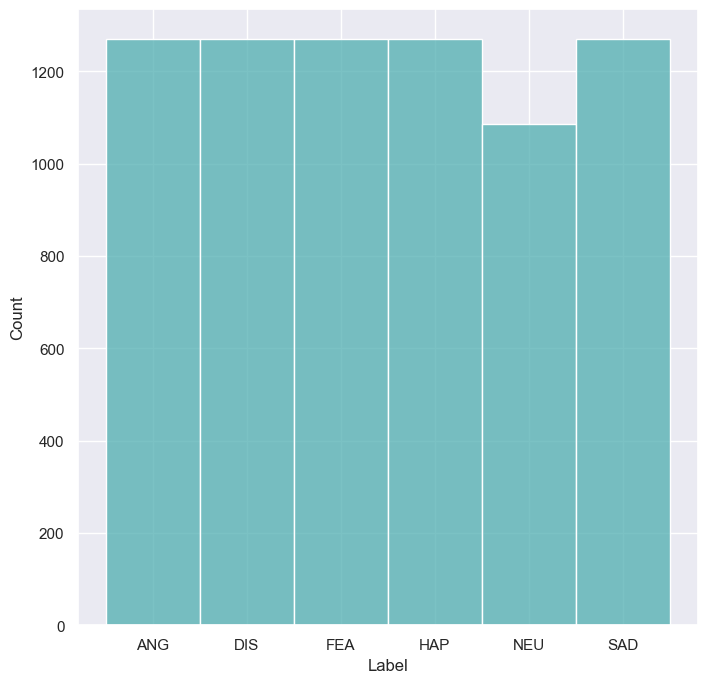

In [7]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('darkgrid')
sns.histplot(labels, color='#4FAEB0')

Same number of files for all emotions except neutral, but the difference is not significant enough to require the use of oversampling.

In [8]:
audio_arrays = []

for i in audio_df['Filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
    
audio_df['Arrays'] = audio_arrays

In [9]:
audio_arrays[0].tolist()

[6.918552397650046e-10,
 8.411215057790855e-10,
 5.090035615218369e-10,
 4.1387743232590424e-10,
 5.618040477273212e-10,
 3.246068969176008e-10,
 1.2844295071978706e-10,
 7.867726609100956e-11,
 -9.20915219082552e-11,
 1.4100969003560948e-10,
 3.6991010254894263e-10,
 2.7726898554902846e-10,
 4.131065767243314e-10,
 4.6124454256002423e-10,
 3.5367758721704945e-10,
 3.4464614495632873e-10,
 2.1460039301146594e-10,
 2.5444224505122293e-10,
 3.469939890976548e-10,
 1.4979399665104864e-10,
 1.5256659824380847e-10,
 1.260560267279942e-10,
 -1.1923967369042998e-10,
 -2.264900766935085e-11,
 1.565738372288905e-10,
 2.2267598875913563e-10,
 3.686025928928416e-10,
 3.5700314926501164e-10,
 1.504304042443394e-10,
 -9.972626197063406e-11,
 -1.230731905277338e-10,
 3.3717365011121103e-10,
 5.915664624822625e-10,
 4.2206158012980666e-10,
 4.3285186546171417e-10,
 2.4531732201182876e-10,
 -1.4809639625745774e-11,
 2.3568488827230283e-10,
 4.785255525163734e-10,
 4.884700421925459e-10,
 4.98159957729

In [10]:
audio_df.head()

,Filepath,Label,Arrays
0,C:\Users\PCLAB\Downloads\Crema\1001_DFA_ANG_XX...,ANG,"[6.9185524e-10, 8.411215e-10, 5.0900356e-10, 4..."
1,C:\Users\PCLAB\Downloads\Crema\1001_DFA_DIS_XX...,DIS,"[0.00083351025, 0.0011382565, 0.0012377766, 0...."
2,C:\Users\PCLAB\Downloads\Crema\1001_DFA_FEA_XX...,FEA,"[0.007539533, 0.009629492, 0.008980679, 0.0084..."
3,C:\Users\PCLAB\Downloads\Crema\1001_DFA_HAP_XX...,HAP,"[-0.0039882455, -0.004723385, -0.0038926, -0.0..."
4,C:\Users\PCLAB\Downloads\Crema\1001_DFA_NEU_XX...,NEU,"[0.0022234665, 0.002518577, 0.001856927, 0.001..."


# Emotions

###  ANGER 

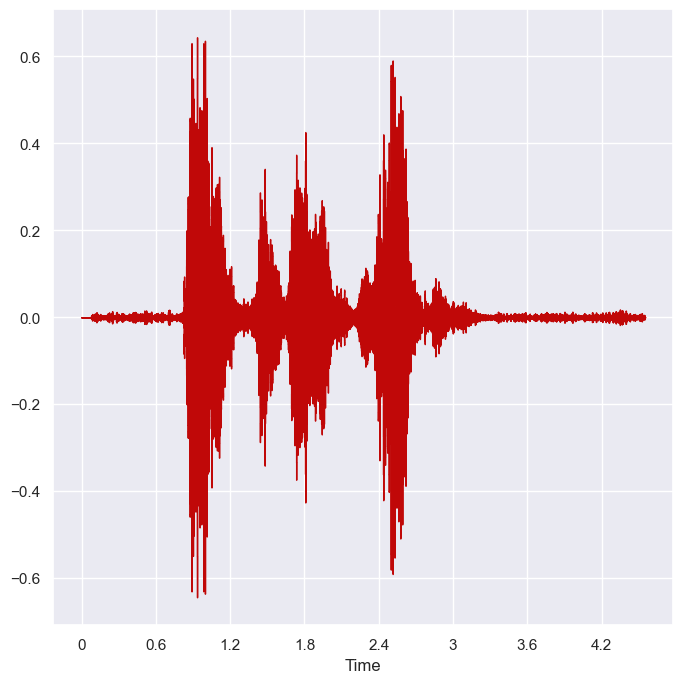

In [11]:
angfile = audio_df[audio_df['Label'] == 'ANG']['Filepath']
angarray = audio_df[audio_df['Label'] == 'ANG']['Arrays']

librosa.display.waveshow(angarray.iloc[0], color='#C00808')
IPython.display.Audio(angfile.iloc[0],)

### DISGUSTING 

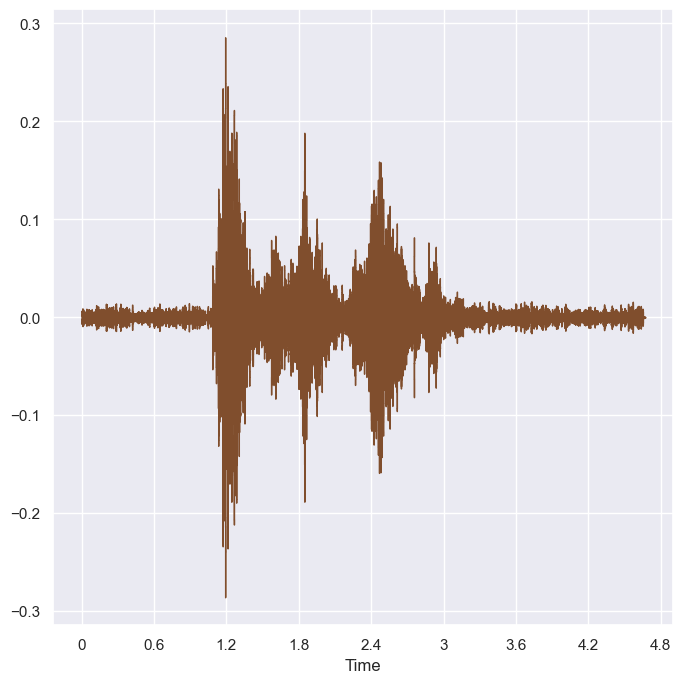

In [12]:
disfile = audio_df[audio_df['Label'] == 'DIS']['Filepath']
disarray = audio_df[audio_df['Label'] == 'DIS']['Arrays']

librosa.display.waveshow(disarray.iloc[0], color='#804E2D')
IPython.display.Audio(disfile.iloc[0])

###  FEAR

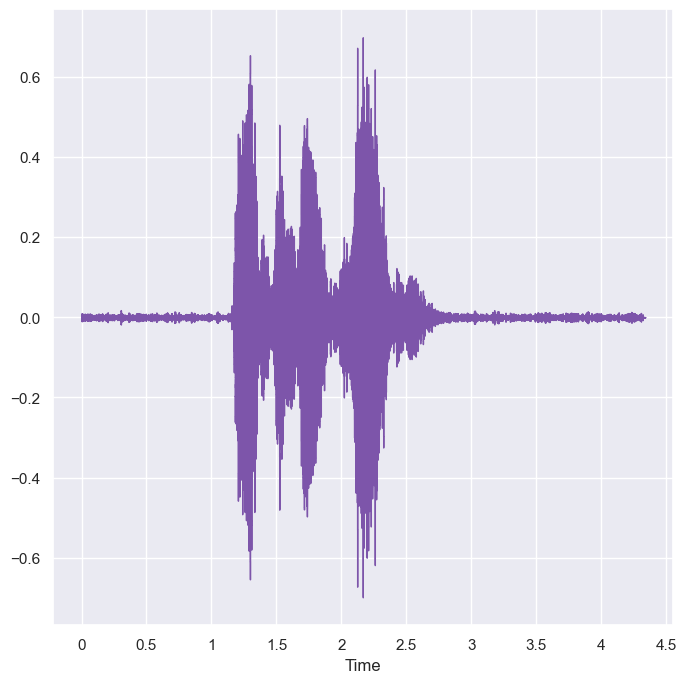

In [13]:
feafile = audio_df[audio_df['Label'] == 'FEA']['Filepath']
feaarray = audio_df[audio_df['Label'] == 'FEA']['Arrays']

librosa.display.waveshow(feaarray.iloc[0], color='#7D55AA')
IPython.display.Audio(feafile.iloc[0])

### HAPPINESS 

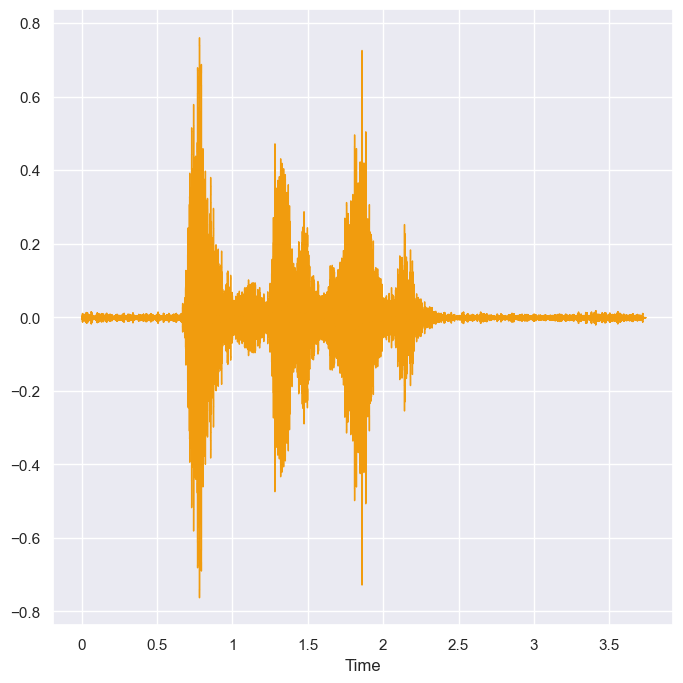

In [14]:
hapfile = audio_df[audio_df['Label'] == 'HAP']['Filepath']
haparray = audio_df[audio_df['Label'] == 'HAP']['Arrays']

librosa.display.waveshow(haparray.iloc[0], color='#F19C0E')
IPython.display.Audio(hapfile.iloc[0])

###  NEUTRAL 

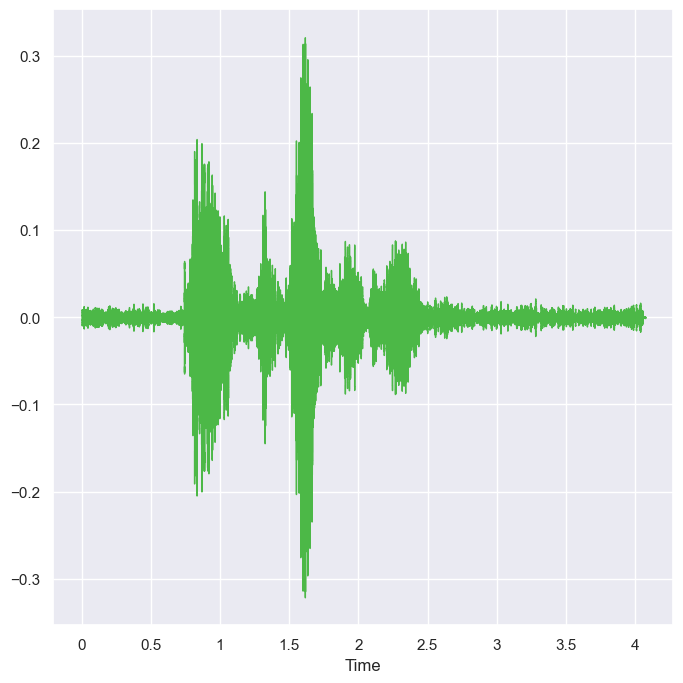

In [15]:
neufile = audio_df[audio_df['Label'] == 'NEU']['Filepath']
neuarray = audio_df[audio_df['Label'] == 'NEU']['Arrays']

librosa.display.waveshow(neuarray.iloc[0], color='#4CB847')
IPython.display.Audio(neufile.iloc[0])

### SAD

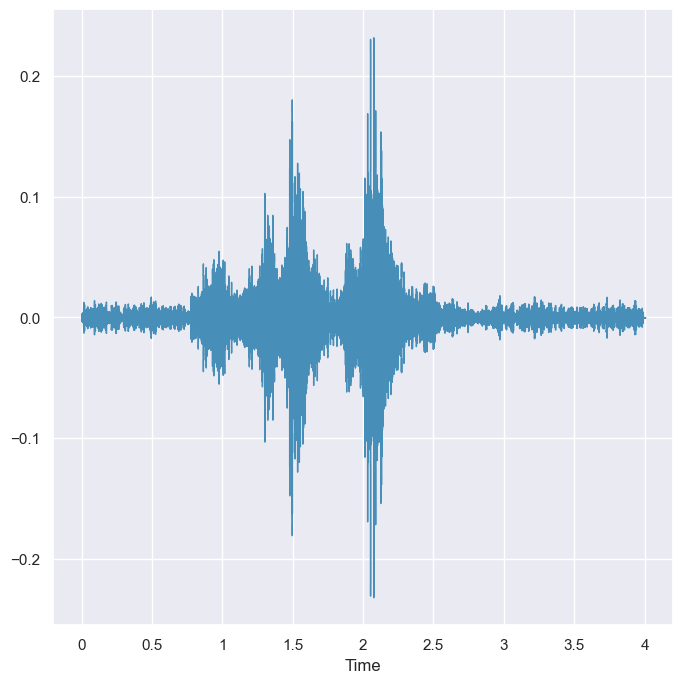

In [16]:
sadfile = audio_df[audio_df['Label'] == 'SAD']['Filepath']
sadarray = audio_df[audio_df['Label'] == 'SAD']['Arrays']

librosa.display.waveshow(sadarray.iloc[0], color='#478FB8')
IPython.display.Audio(sadfile.iloc[0])

Honestly, I would even find it difficult to define the emotions in each of these clips, so it will be interesting to see if we can create a model capable of doing it!

## Data Augmentation

In [17]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate = 0.8)

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=sr,n_steps=2)

##  Features Extracting

In [18]:
def extract_features(data):
    # Zero Crossing Rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))     

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mel))
    
    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0);
    result = np.hstack((result, tonnetz));
    
    return result

In [19]:
def get_features(data):
    result = []
    
    # without augmentation
    res1 = extract_features(data)
    result.append(res1)
    
    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result.append(res2)
    
    # with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data)
    res3 = extract_features(data_stretch_pitch)
    result.append(res3)
    
    return result

In [20]:
np.array(audio_df['Arrays'].iloc[0].tolist())

array([6.91855240e-10, 8.41121506e-10, 5.09003562e-10, ...,
       2.29877173e-07, 2.13886187e-06, 0.00000000e+00])

In [21]:
import pickle

In [57]:
warnings.filterwarnings('ignore')

x = []
y = []
for i in range(len(audio_df)):
    feature=get_features(audio_df['Arrays'].iloc[i]);
    for j in feature:
        x.append(j)
        y.append(audio_df['Label'].iloc[i])

In [58]:
print(x)
print(y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



For saving the data into file for future use


In [59]:
with open('X_data.pkl', 'wb') as f:
    pickle.dump(x, f)

In [60]:
with open('Y_data.pkl', 'wb') as f:
    pickle.dump(y, f)

In [61]:
with open('X_data.pkl', 'rb') as f:
    x_list = pickle.load(f)

In [62]:
with open('Y_data.pkl', 'rb') as f:
    y_list = pickle.load(f)

In [63]:
print(x_list)
print(y_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [64]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y_list))
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

## Train Test Split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x_list), np.array(y), test_size=0.2)

In [66]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((17860, 167), (17860, 6), (4466, 167), (4466, 6))


In [67]:
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)

In [68]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((17860, 167, 1), (17860, 6), (4466, 167, 1), (4466, 6))


##   Model Creating

In [69]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0005),
             metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 165, 128)          512       
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 165, 128)          0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 163, 256)          98560     
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 163, 256)          0         
 ng1D)                                                           
                                                                 
 conv1d_14 (Conv1D)          (None, 161, 512)          393728    
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 161, 512)         

In [71]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/50
140/140 [==============================] - 245s 2s/step - loss: 1.7281 - accuracy: 0.2386 - val_loss: 1.6722 - val_accuracy: 0.2810
Epoch 2/50
140/140 [==============================] - 240s 2s/step - loss: 1.5893 - accuracy: 0.3279 - val_loss: 1.5441 - val_accuracy: 0.3648
Epoch 3/50
140/140 [==============================] - 240s 2s/step - loss: 1.5364 - accuracy: 0.3596 - val_loss: 1.5136 - val_accuracy: 0.3721
Epoch 4/50
140/140 [==============================] - 244s 2s/step - loss: 1.5093 - accuracy: 0.3726 - val_loss: 1.5289 - val_accuracy: 0.3650
Epoch 5/50
140/140 [==============================] - 242s 2s/step - loss: 1.4882 - accuracy: 0.3837 - val_loss: 1.4963 - val_accuracy: 0.3742
Epoch 6/50
140/140 [==============================] - 241s 2s/step - loss: 1.4729 - accuracy: 0.3898 - val_loss: 1.4711 - val_accuracy: 0.3932
Epoch 7/50
140/140 [==============================] - 240s 2s/step - loss: 1.4594 - accuracy: 0.3991 - val_loss: 1.4413 - val_accuracy: 0.4021

##  Evaluating the Model

140/140 [==============================] - 13s 88ms/step


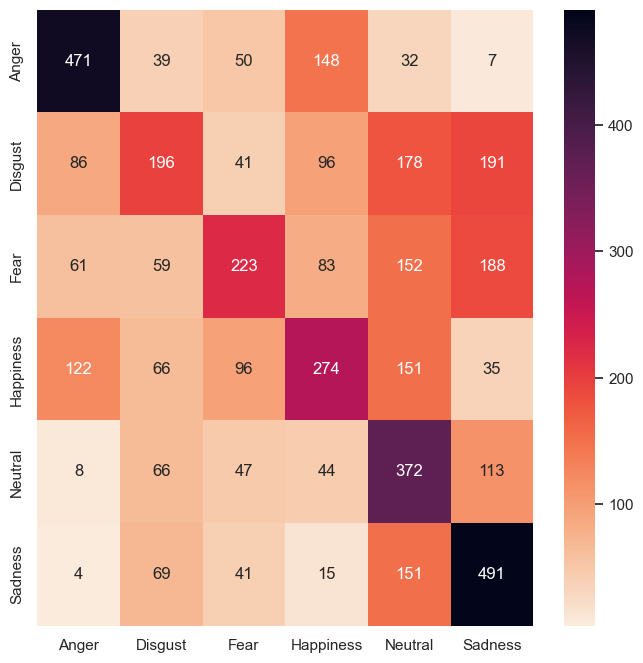

In [72]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])